# Exercise - Create a Router with LangGraph - STARTER

In this exercise, you will build a router using LangGraph to dynamically control the flow of your application.

## **Scenario**

Imagine you're building a smart assistant that can handle various types of requests through a single conversation interface. Your assistant should understand the user's intent and respond accordingly — but each task may require a different prompt structure or strategy.

To manage this complexity, you'll build a node router. This router will evaluate the user input and choose the most appropriate node to use. For example, it should be able to decide whether the user is asking for a summary, a translation, or a general question — and route the request to the correct prompt logic.

## **Challenge**

You're building a text processing application that can:

- Reverse a string (e.g., "hello" → "olleh")
- Convert a string to uppercase (e.g., "hello" → "HELLO")

Your application should:

- Accept user input and an action type.
- Route to the appropriate node (reverse or upper) based on the action.
- Handle invalid actions gracefully.

This will be achieved by routing the input through LangGraph nodes using a conditional edge.

## 0. Import the necessary libs

In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

## 1. State Schema

We’ll use Python’s TypedDict to define the structure of our state:

- input: The user’s input string.
- action: The action to be performed (reverse or upper).
- output: The processed output.

Then initialize the State Graph with the state schema you have created

In [2]:
# TODO - Create the State Schema class
class State(TypedDict):
    input: str
    action: Literal["reverse", "upper"]
    output: str


## 2. Nodes

Create the logics in your nodes.
- Node A should reverse the input
- Node B should convert input to uppercase

Then add the nodes to the workflow.

In [3]:
def node_a(state: State):
    print("Node A\n")

    # TODO - Reverse
    output = state["input"][::-1]
    
    print(f"output: {output}")
    return {"output": output}

In [4]:
def node_b(state: State):
    print("Node B\n")

    # TODO - Uppercase
    output = state["input"].upper()
    
    print(f"output: {output}")
    return {"output": output}

In [5]:
def error_node(state: State):
    print("Error Node \n")

    output = "Invalid action"
    print(f"output: {output}")

In [6]:
workflow = StateGraph(State)

In [7]:
# TODO- Add node A to the workflow
workflow.add_node("node_a", node_a)

In [8]:
# TODO - Add node B to the workflow
workflow.add_node("node_b", node_b)

In [9]:
workflow.add_node("error_node", error_node)

## 3. Routing Function

Create a routing function to determine which node to execute based on the action. If action is reverse, it should return node A, if action is upper, node B.


In [10]:
# TODO - The routing function
def routing_function(state: State):
    if state["action"] == "reverse":
        return "node_a"
    if state["action"] == "upper":
        return "node_b"
    else:
        return "error_node"
    

## 4. Edges

Use conditional edges to control the flow of data:

- START → routing_function to decide the path.
- node_a → END for reverse.
- node_b → END for uppercase.

In add_conditional_edges() method, use source, path and path_map as the necessary arguments for routing.

In [11]:
# TODO - Add your condital edges
workflow.add_conditional_edges(
    source=START, 
    path=routing_function, 
    path_map=["node_a", "node_b", "error_node"]
)

In [12]:
workflow.add_edge("node_a", END)
workflow.add_edge("node_b", END)
workflow.add_edge("error_node", END)
workflow.add_edge(START, END)

## 5. Compile and Run

Compile the graph, display and run it with different actions.

In [13]:
graph = workflow.compile()

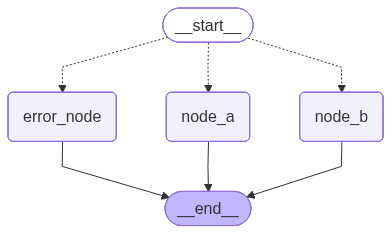

In [14]:
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [15]:
# TODO - Input upper action
graph.invoke(
    input = {
        "input": "hello",
        "action": "upper"
    }, 
)

Node B

output: HELLO


{'input': 'hello', 'action': 'upper', 'output': 'HELLO'}

In [16]:
# TODO - Input reverse action
graph.invoke(
    input = {
        "input": "hello",
        "action": "reverse"
    }, 
)

Node A

output: olleh


{'input': 'hello', 'action': 'reverse', 'output': 'olleh'}

In [17]:
graph.invoke(
    input = {
        "input": "hello",
        "action": "poem"
    }, 
)


Error Node 

output: Invalid action


{'input': 'hello', 'action': 'poem'}

## 6. Experiment

Now that you understood how it works, experiment with new things.
- Test different scenarios, like passing "lower" as the actions
- Make it more robust when this case happen
- Add more actions